# Acquire and Wrangle - Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

1. Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

In [2]:
df = wrangle.get_zillow_data()

Returning saved csv file.


/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_20145/3731415435.py:1: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  df = wrangle.get_zillow_data()


2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
initial_shape = df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      77414 non-null  float64
 1   transdate                     77414 non-null  object 
 2   id                            77414 non-null  int64  
 3   parcelid                      77414 non-null  int64  
 4   airconditioningtypeid         24953 non-null  float64
 5   architecturalstyletypeid      206 non-null    float64
 6   basementsqft                  50 non-null     float64
 7   bathroomcnt                   77381 non-null  float64
 8   bedroomcnt                    77381 non-null  float64
 9   buildingclasstypeid           15 non-null     float64
 10  buildingqualitytypeid         49672 non-null  float64
 11  calculatedbathnbr             76772 non-null  float64
 12  decktypeid                    614 non-null    float64
 13  f

Lots of missing data in some rows. mainly float, even for things that might be better as int

In [4]:
df.describe()

,logerror,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,77414.000000,7.741400e+04,7.741400e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,...,77118.000000,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04
mean,0.016578,1.495774e+06,1.300670e+07,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,...,1968.635831,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13
std,0.170342,8.612720e+05,3.480690e+06,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,...,23.786032,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12
min,-4.655420,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,...,1824.000000,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13
25%,-0.024387,7.524398e+05,1.153834e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,...,1953.000000,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13
50%,0.006624,1.498474e+06,1.253072e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,...,1970.000000,1.000000,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13
75%,0.039211,2.241722e+06,1.421149e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,...,1987.000000,2.000000,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13
max,5.262999,2.985182e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,...,2016.000000,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14


Distributions as histograms

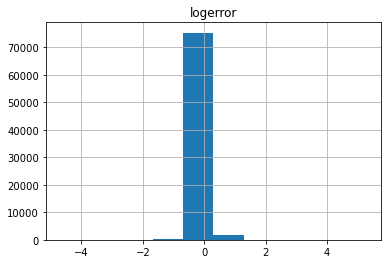

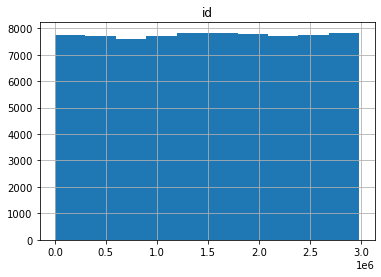

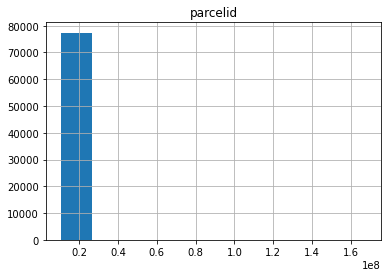

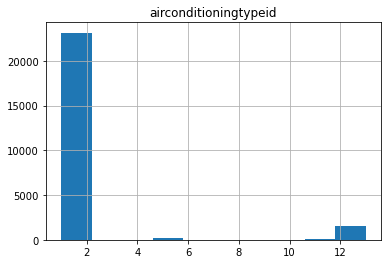

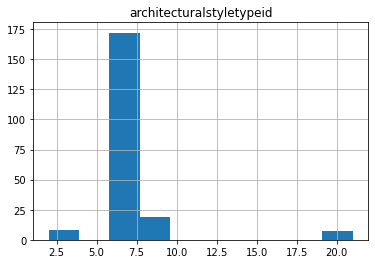

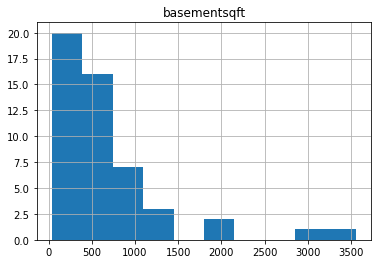

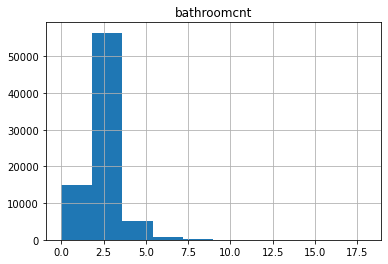

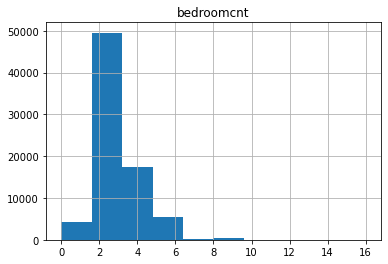

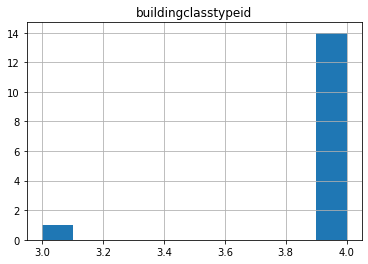

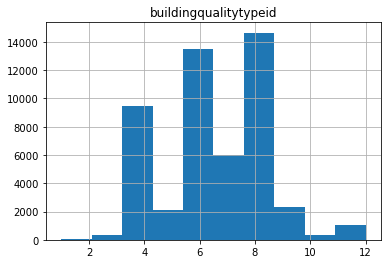

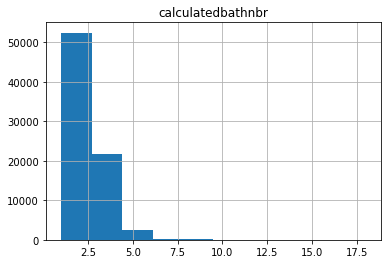

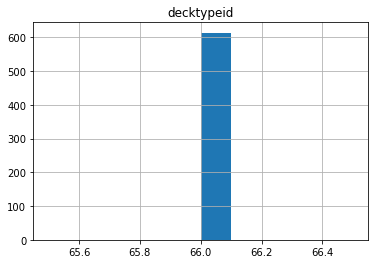

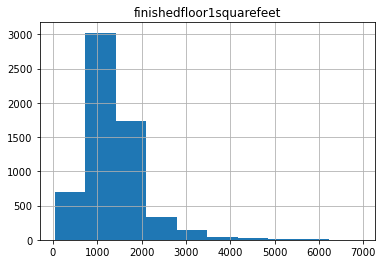

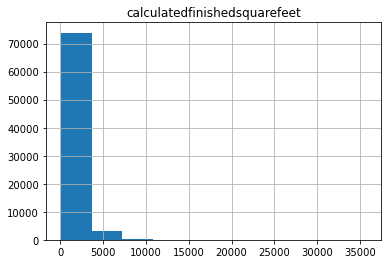

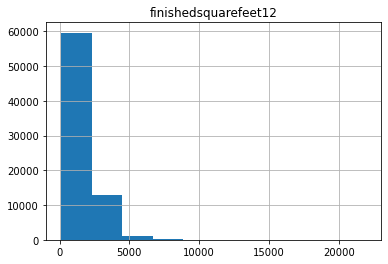

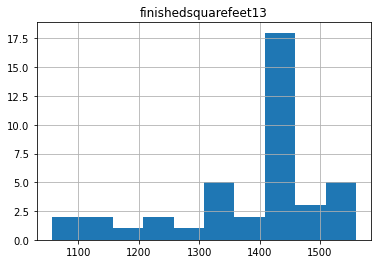

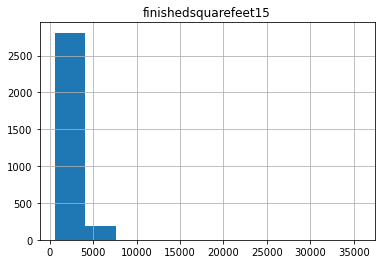

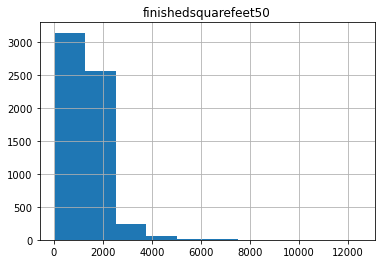

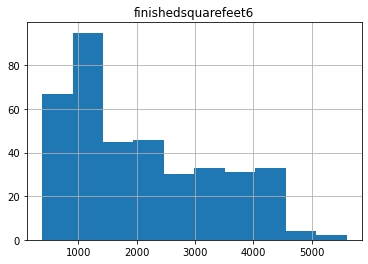

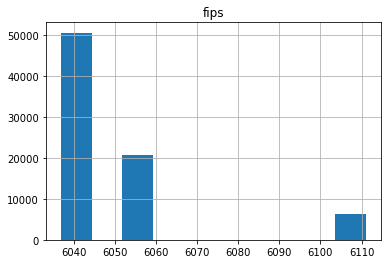

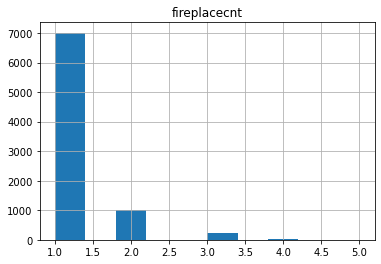

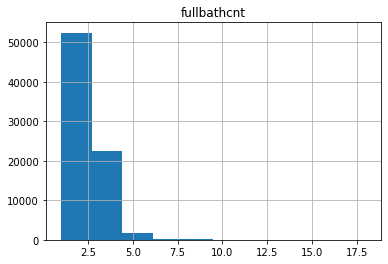

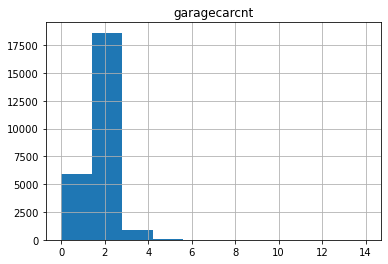

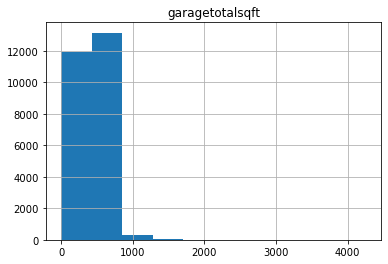

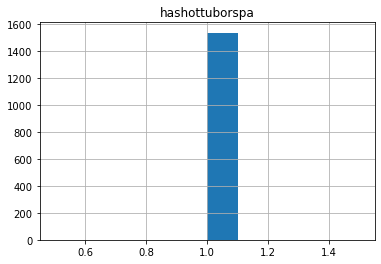

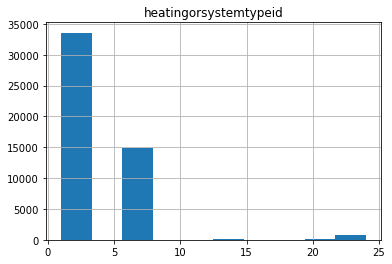

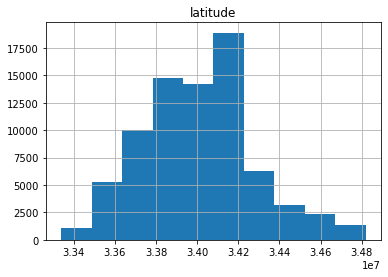

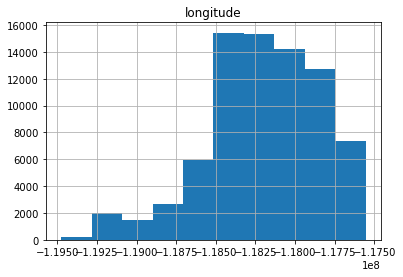

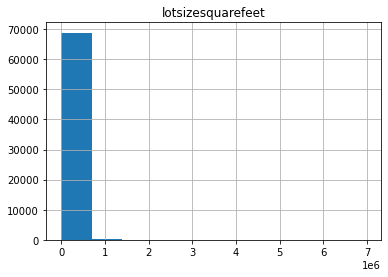

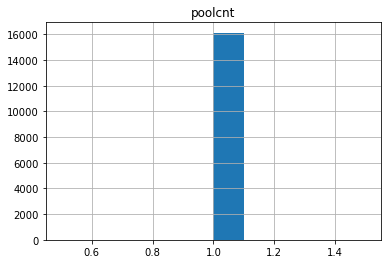

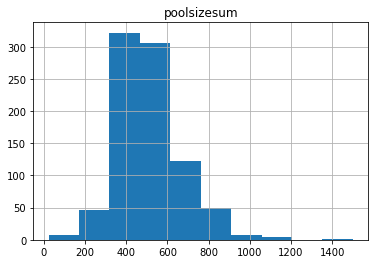

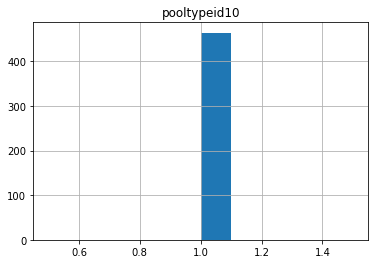

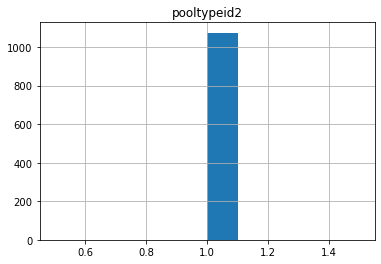

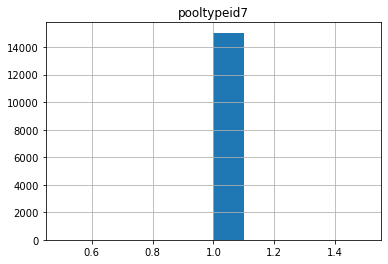

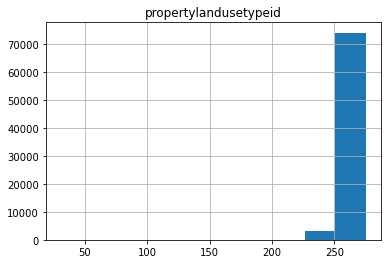

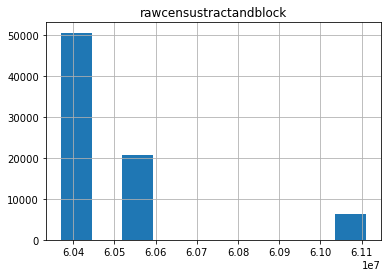

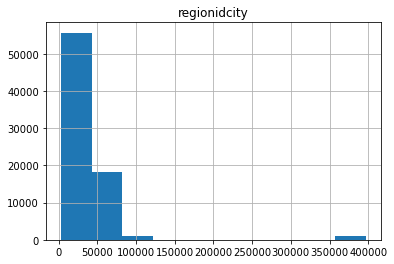

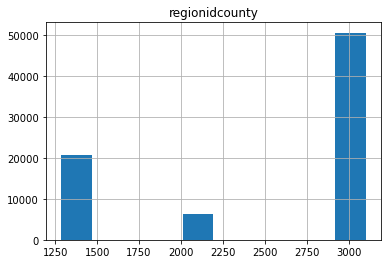

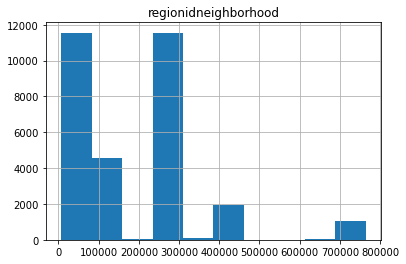

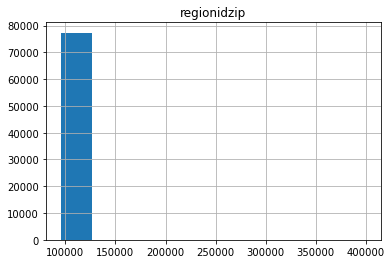

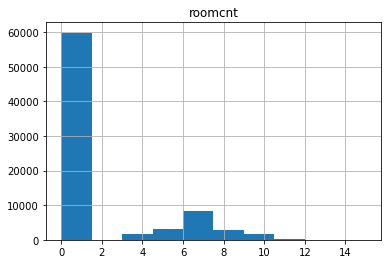

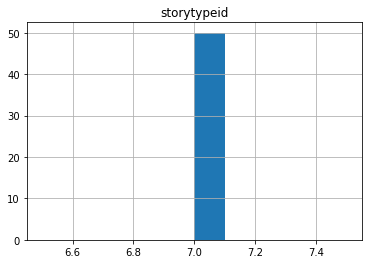

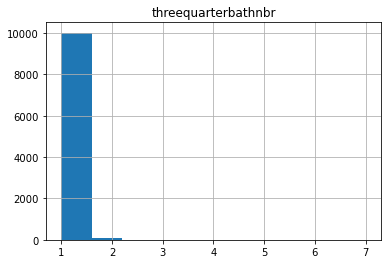

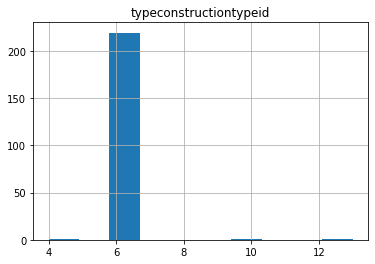

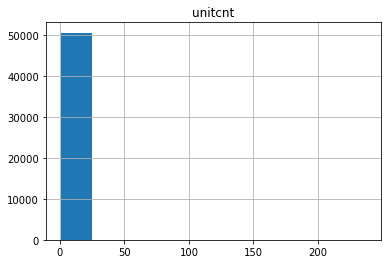

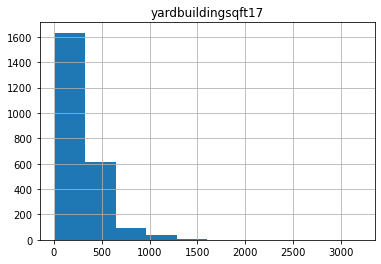

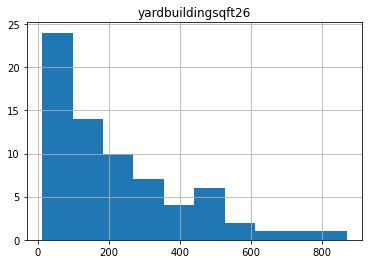

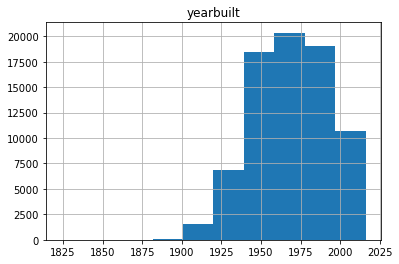

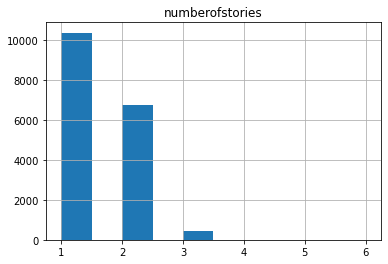

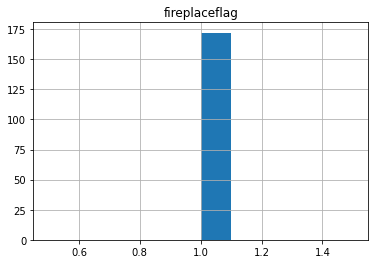

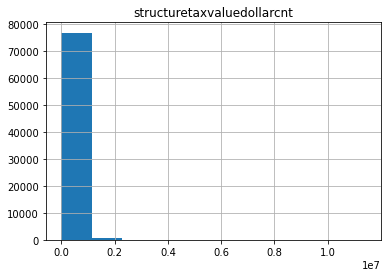

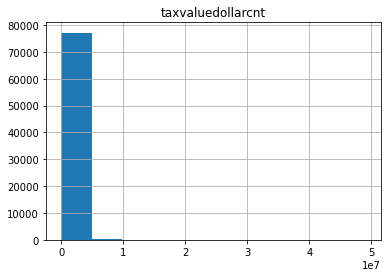

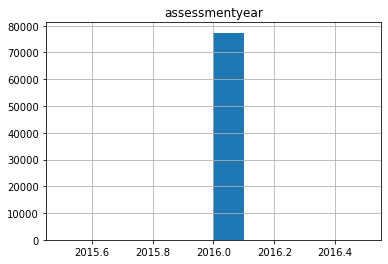

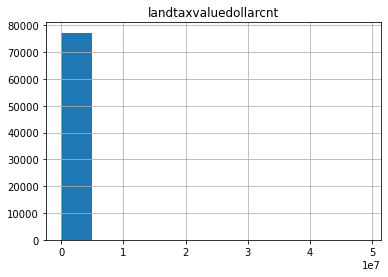

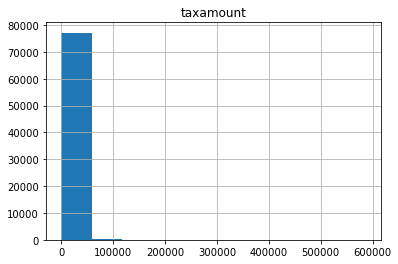

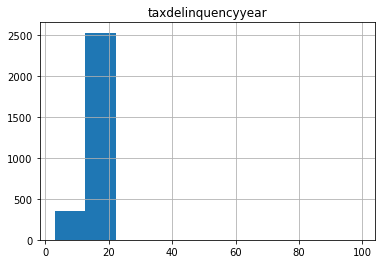

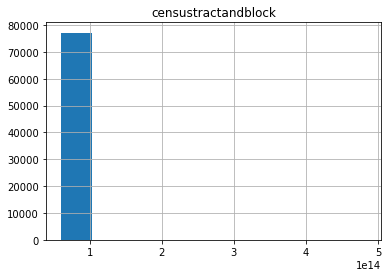

In [5]:
for col in df.select_dtypes(exclude='object').columns.tolist():
    df[col].hist()
    plt.title(col)
    plt.show()

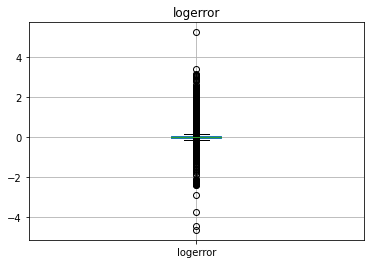

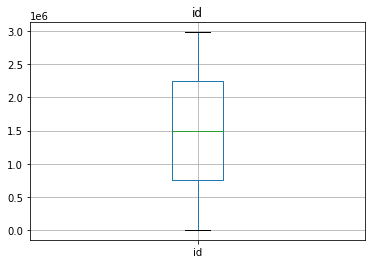

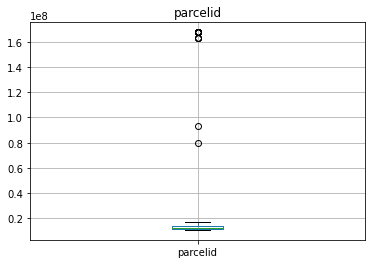

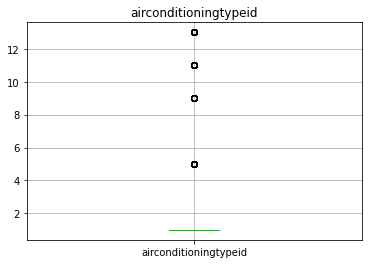

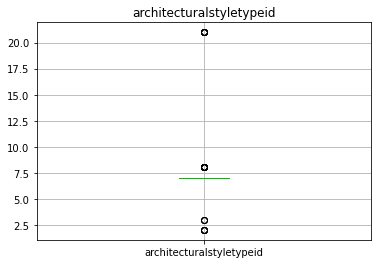

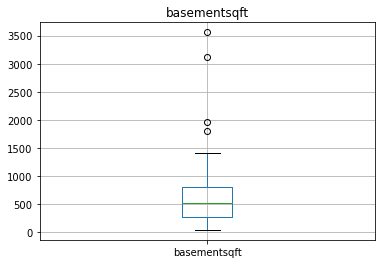

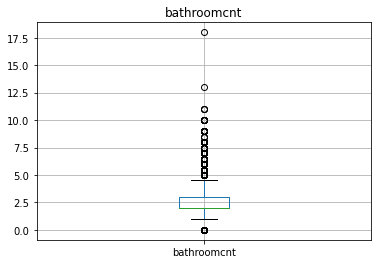

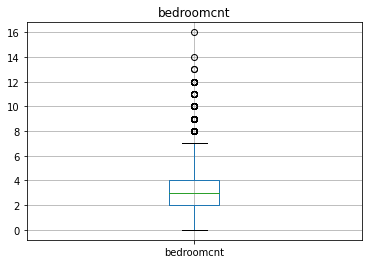

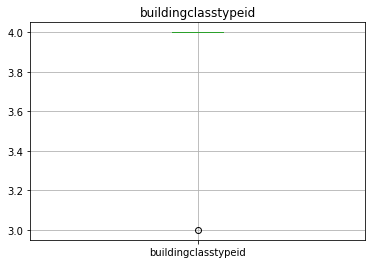

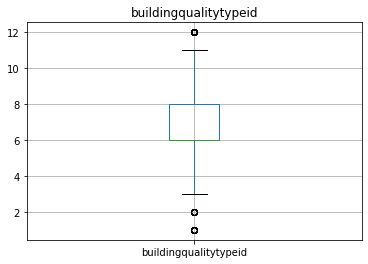

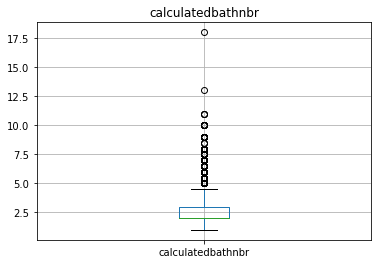

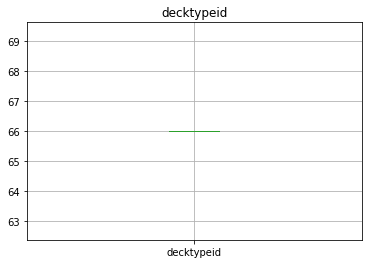

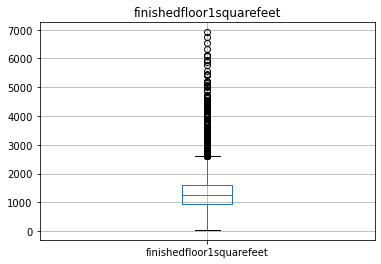

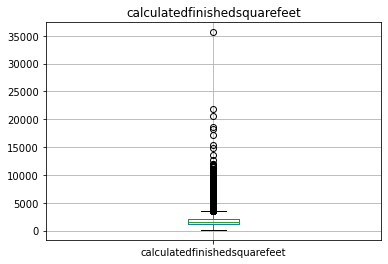

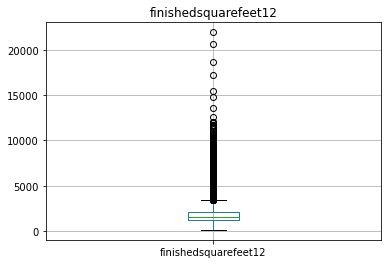

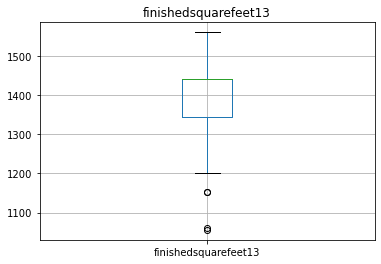

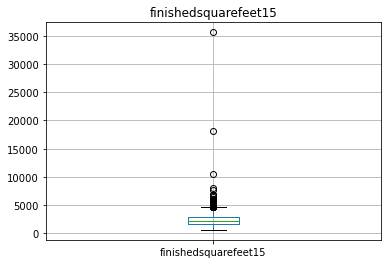

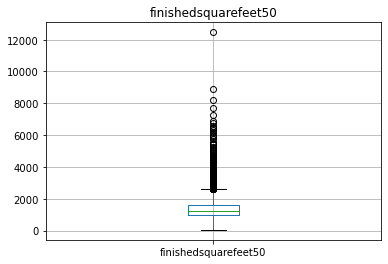

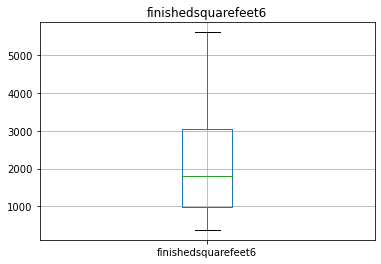

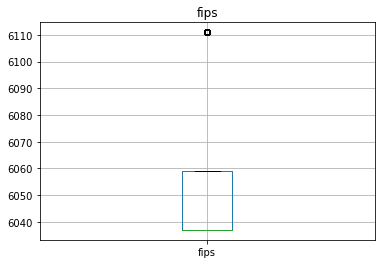

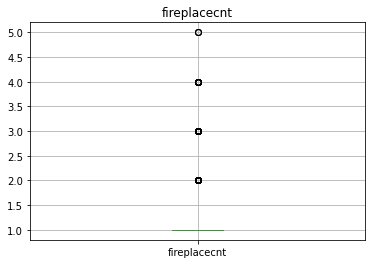

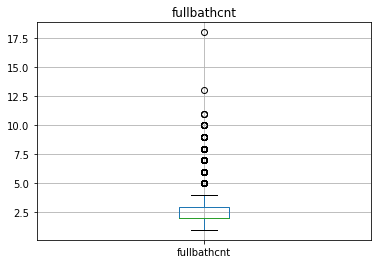

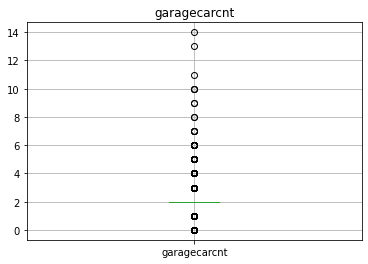

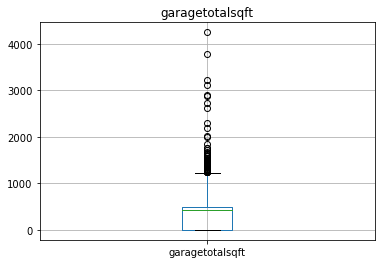

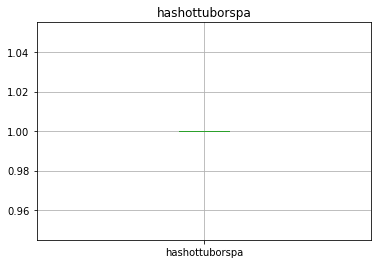

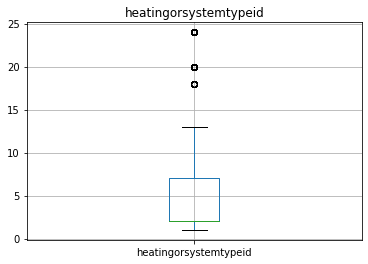

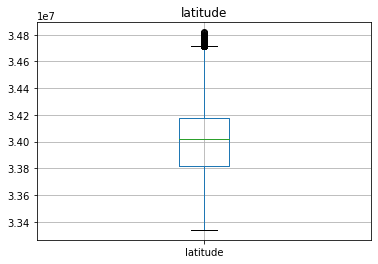

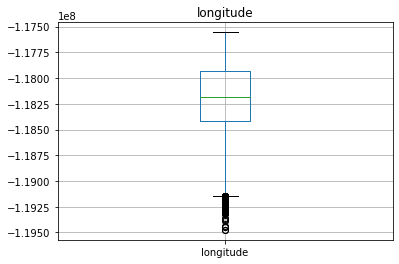

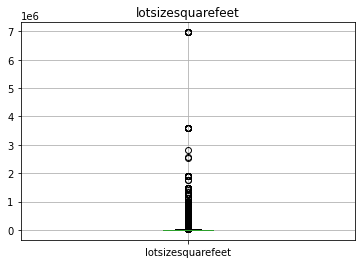

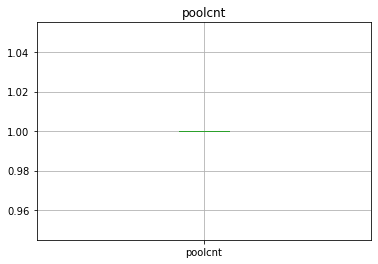

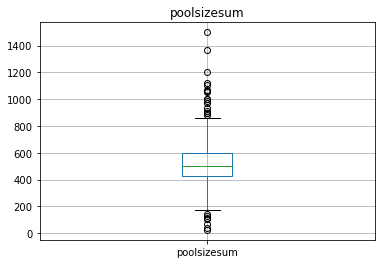

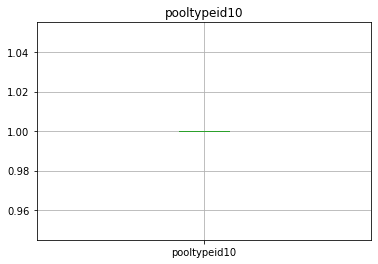

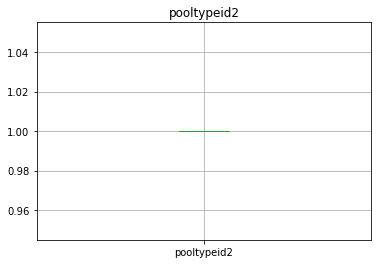

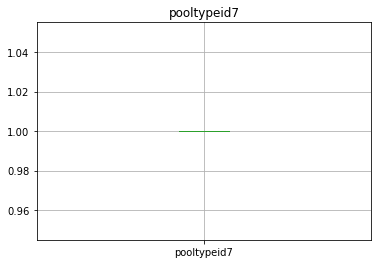

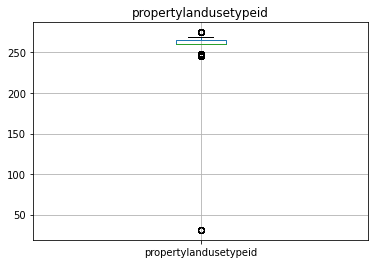

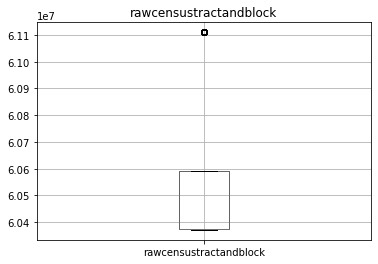

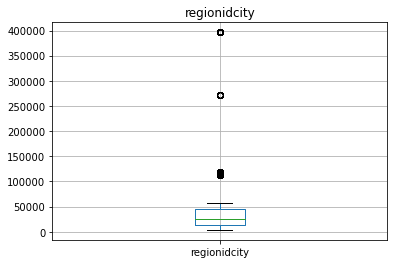

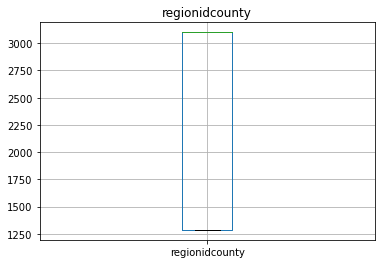

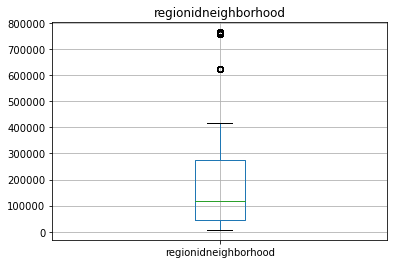

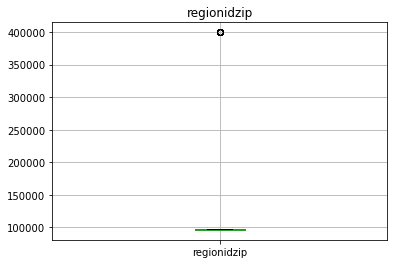

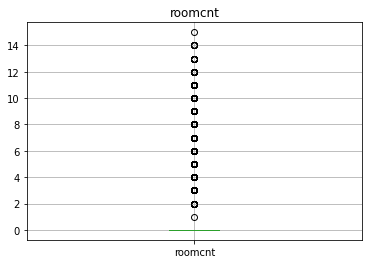

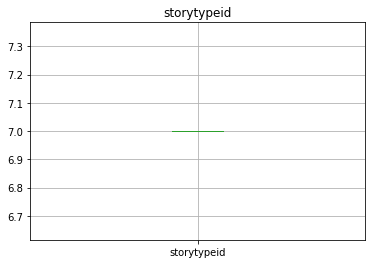

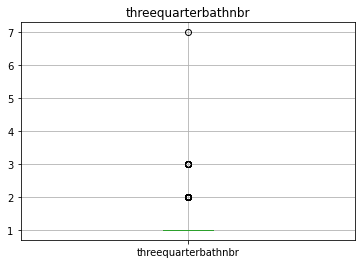

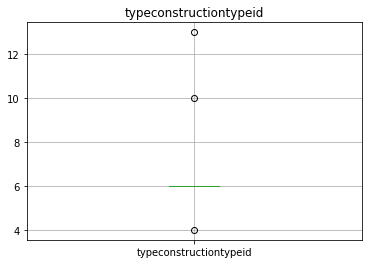

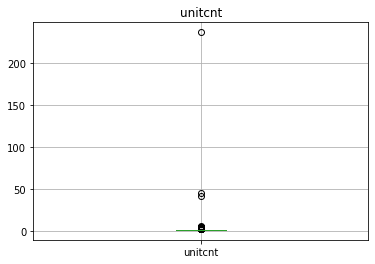

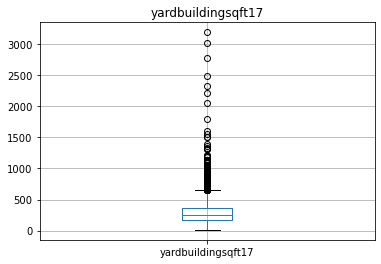

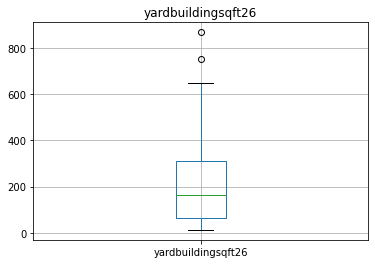

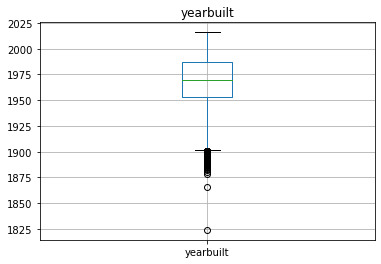

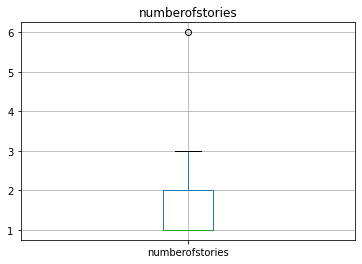

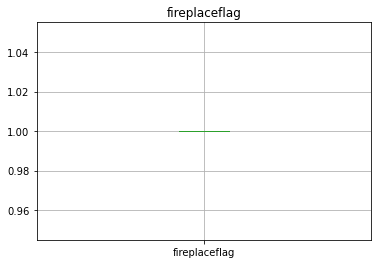

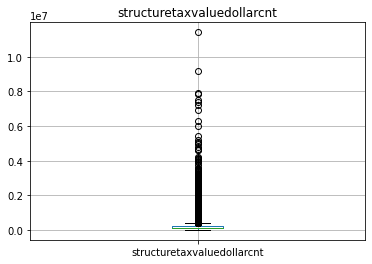

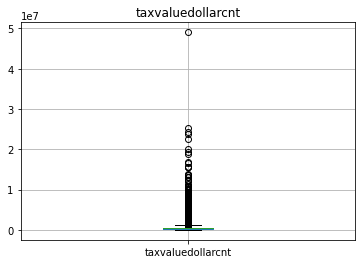

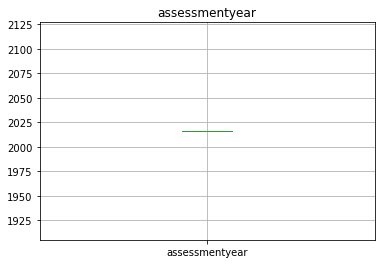

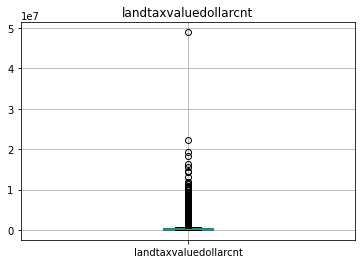

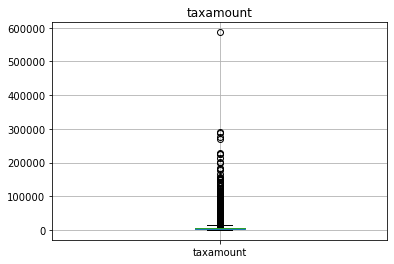

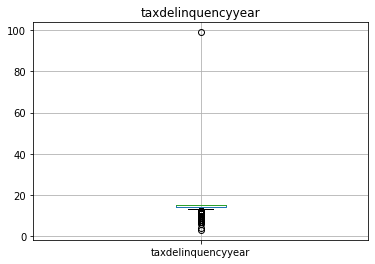

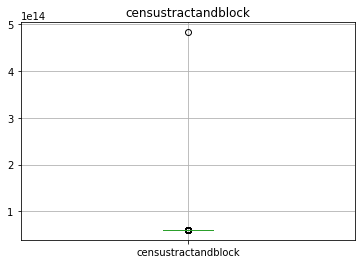

In [6]:
for col in df.select_dtypes(exclude='object').columns.tolist():
    df.boxplot(column=[col])
    plt.title(col)
    plt.show()

In [7]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts())

2017-06-30    1190
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
              ... 
2017-03-12       1
2017-07-22       1
2017-08-05       1
2017-08-06       1
2018-05-25       1
Name: transdate, Length: 265, dtype: int64
0100    26714
122     13045
010C     8813
0101     6399
34       4922
        ...  
0115        1
0131        1
1432        1
040G        1
020E        1
Name: propertycountylandusecode, Length: 75, dtype: int64
LAR1         6747
LAR3         2437
LARS         1389
LBR1N        1222
LARD1.5      1127
             ... 
PSR47200*       1
LBRR2I          1
PD SP           1
AVR2*           1
BFA15000*       1
Name: propertyzoningdesc, Length: 1907, dtype: int64
Y    2886
Name: taxdelinquencyflag, dtype: int64
Frame       219
Masonry       1
Metal         1
Concrete      1
Name: typeconstructiondesc, dtype: int64
Basement    50
Name: storydesc, dtype: int64
Single Family Residential                     52320
Condominium                       

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
def return_col_percent_null(df, max_null_percent = 1.0):
    '''Returns a dataframe with columns of the column of df, the percent nulls in the column, and the count of nulls.

    Args:
        df (dataframe) : a dataframe 
        max_null_percent = 1.0 (float) : returns all columns with percent nulls less than max_null_percent
    Return:
        (dataframe) : dataframe returns with df column names, percent nulls, and null count
    '''
    outputs = [] #to store output
    for column in df.columns: #loop through the columns
        #store and get information
        output = {
            'column_name': column,
            'count_null' : df[column].isna().sum(),
            'percent_null' : round(df[column].isna().sum()/df[column].shape[0], 4)
        }
        #append information
        outputs.append(output)
    #make a dataframe
    columns_percent_null = pd.DataFrame(outputs)
    #return the dataframe with the max_null_percent_filter
    return columns_percent_null[columns_percent_null.percent_null <= max_null_percent]

null_proportion = return_col_percent_null(df)

In [9]:
null_proportion

,column_name,count_null,percent_null
0,logerror,0,0.0000
1,transdate,0,0.0000
2,id,0,0.0000
3,parcelid,0,0.0000
4,airconditioningtypeid,52461,0.6777
...,...,...,...
63,propertylandusedesc,33,0.0004
64,heatingorsystemdesc,27974,0.3614
65,airconditioningdesc,52461,0.6777
66,architecturalstyledesc,77208,0.9973


<AxesSubplot:xlabel='column_name', ylabel='percent_null'>

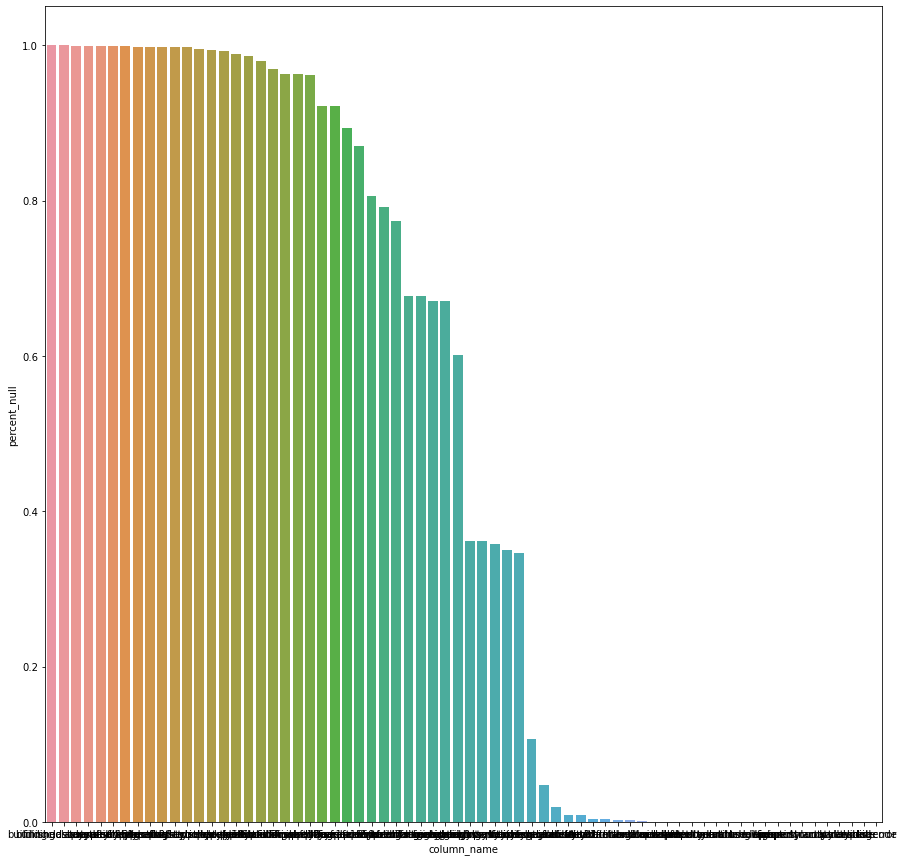

In [10]:
plt.figure(figsize = (15,15))
sns.barplot(data = null_proportion.sort_values('percent_null', ascending=False), x = 'column_name', y = 'percent_null')

In [11]:
pd.set_option('display.max_rows', None)
null_proportion.sort_values('percent_null', ascending=False)

,column_name,count_null,percent_null
67,buildingclassdesc,77399,0.9998
9,buildingclasstypeid,77399,0.9998
16,finishedsquarefeet13,77373,0.9995
62,storydesc,77364,0.9994
6,basementsqft,77364,0.9994
44,storytypeid,77364,0.9994
49,yardbuildingsqft26,77344,0.9991
52,fireplaceflag,77242,0.9978
5,architecturalstyletypeid,77208,0.9973
66,architecturalstyledesc,77208,0.9973


In [12]:
pd.set_option('display.max_rows', 10)
null_proportion

,column_name,count_null,percent_null
0,logerror,0,0.0000
1,transdate,0,0.0000
2,id,0,0.0000
3,parcelid,0,0.0000
4,airconditioningtypeid,52461,0.6777
...,...,...,...
63,propertylandusedesc,33,0.0004
64,heatingorsystemdesc,27974,0.3614
65,airconditioningdesc,52461,0.6777
66,architecturalstyledesc,77208,0.9973


In [13]:
df[~df.unitcnt.isna()][['propertylandusedesc']]

,propertylandusedesc
3,Single Family Residential
4,Condominium
6,Single Family Residential
7,Single Family Residential
8,Single Family Residential
...,...
77408,Condominium
77409,Single Family Residential
77411,Single Family Residential
77412,Single Family Residential


In [14]:
df.poolcnt.value_counts()

1.0    16137
Name: poolcnt, dtype: int64

Most likely can choose a percent at which to exclude a column from analysis. However some binary categories could be filled by assuming the property does not have something.  For example, `poolcnt` values are only one, assume that the other properties have no pool.

## Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [15]:
pd.set_option('display.max_rows', None)
df['propertylandusedesc'].value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [16]:
pd.set_option('display.max_rows', 10)
df['unitcnt'].value_counts()

1.0      47293
2.0       2018
4.0        723
3.0        525
45.0         1
42.0         1
6.0          1
237.0        1
Name: unitcnt, dtype: int64

Can remove any row with `unitcnt` > 1, and then keep only `Single Family Residential`, `Mobile Home`, `Manufactured, Modular, Prefabricated Homes`, `Residential General` and `Townhouse`.

In [17]:
(df['unitcnt'] == 1).mean() # will keep 0.61 of the data

0.6109101712868473

In [18]:
df = df[df['unitcnt'] == 1]

In [19]:
filter_cols = ['Single Family Residential', 'Mobile Home', 'Manufactured, Modular, Prefabricated Homes', 'Residential General', 'Townhouse']
(df['propertylandusedesc'].isin(filter_cols)).mean() #will get 0.71 of remaining data

0.714756940773476

In [20]:
df = df[df['propertylandusedesc'].isin(filter_cols)]

In [21]:
df.shape[0]/initial_shape[0]

0.4366522851163872

There is now 0.44 of the data.

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [22]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    null_proportion_df = return_col_percent_null(df)
    columns_to_keep = null_proportion_df[null_proportion_df['percent_null'] < ( 1 - prop_required_column)]['column_name'].tolist()
    df = df[columns_to_keep]
    df = df[(df.isnull().sum(axis=1)/df.shape[1] < (1 - prop_required_row))]
    return df

func_df = handle_missing_values(df, 0.99, 0.99)
func_df

,logerror,transdate,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
3,-0.103410,2017-01-01,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,...,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential
6,-0.001011,2017-01-01,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,...,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential
7,0.101723,2017-01-01,870991,12069064,1.0,2.0,5.0,1.0,738.0,738.0,...,0.0,1.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,6.037302e+13,Single Family Residential
8,-0.040966,2017-01-02,1246926,12790562,3.0,4.0,9.0,3.0,3039.0,3039.0,...,0.0,1.0,1970.0,177527.0,220583.0,2016.0,43056.0,3104.19,6.037500e+13,Single Family Residential
10,0.005963,2017-01-02,1639362,11104527,3.0,4.0,8.0,3.0,2540.0,2540.0,...,0.0,1.0,1999.0,271715.0,430108.0,2016.0,158393.0,6103.36,6.037920e+13,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77407,0.001082,2017-09-19,2274245,12412492,2.0,4.0,6.0,2.0,1633.0,1633.0,...,0.0,1.0,1962.0,125466.0,346534.0,2016.0,221068.0,4175.08,6.037555e+13,Single Family Residential
77409,0.020615,2017-09-20,673515,11000655,2.0,2.0,6.0,2.0,1286.0,1286.0,...,0.0,1.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,Single Family Residential
77411,0.037129,2017-09-21,1843709,12773139,1.0,3.0,4.0,1.0,1032.0,1032.0,...,0.0,1.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,Single Family Residential
77412,0.007204,2017-09-25,1187175,12826780,2.0,3.0,6.0,2.0,1762.0,1762.0,...,0.0,1.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,Single Family Residential


In [23]:
func_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33217 entries, 3 to 77413
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   logerror                      33217 non-null  float64
 1   transdate                     33217 non-null  object 
 2   id                            33217 non-null  int64  
 3   parcelid                      33217 non-null  int64  
 4   bathroomcnt                   33217 non-null  float64
 5   bedroomcnt                    33217 non-null  float64
 6   buildingqualitytypeid         33217 non-null  float64
 7   calculatedbathnbr             33217 non-null  float64
 8   calculatedfinishedsquarefeet  33217 non-null  float64
 9   finishedsquarefeet12          33217 non-null  float64
 10  fips                          33217 non-null  float64
 11  fullbathcnt                   33217 non-null  float64
 12  latitude                      33217 non-null  float64
 13  l

3. Encapsulate your work inside of functions in a wrangle_zillow.py module.

In [24]:
import wrangle_zillow

In [25]:
wrangle_zillow.wrangle_data()

Returning saved csv file.


/Users/stephenfitzsimon/codeup-data-science/clustering-exercises/wrangle_zillow.py:17: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  df = get_zillow_data()


,logerror,transdate,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
3,-0.103410,2017-01-01,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,...,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential
6,-0.001011,2017-01-01,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,...,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential
7,0.101723,2017-01-01,870991,12069064,1.0,2.0,5.0,1.0,738.0,738.0,...,0.0,1.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,6.037302e+13,Single Family Residential
8,-0.040966,2017-01-02,1246926,12790562,3.0,4.0,9.0,3.0,3039.0,3039.0,...,0.0,1.0,1970.0,177527.0,220583.0,2016.0,43056.0,3104.19,6.037500e+13,Single Family Residential
10,0.005963,2017-01-02,1639362,11104527,3.0,4.0,8.0,3.0,2540.0,2540.0,...,0.0,1.0,1999.0,271715.0,430108.0,2016.0,158393.0,6103.36,6.037920e+13,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77407,0.001082,2017-09-19,2274245,12412492,2.0,4.0,6.0,2.0,1633.0,1633.0,...,0.0,1.0,1962.0,125466.0,346534.0,2016.0,221068.0,4175.08,6.037555e+13,Single Family Residential
77409,0.020615,2017-09-20,673515,11000655,2.0,2.0,6.0,2.0,1286.0,1286.0,...,0.0,1.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,Single Family Residential
77411,0.037129,2017-09-21,1843709,12773139,1.0,3.0,4.0,1.0,1032.0,1032.0,...,0.0,1.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,Single Family Residential
77412,0.007204,2017-09-25,1187175,12826780,2.0,3.0,6.0,2.0,1762.0,1762.0,...,0.0,1.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,Single Family Residential


## Mall customer data

1. Acquire data from the customers table in the mall_customers database. 

In [26]:
import os
from env import get_db_url

def acquire_mall(query_db=False):
    #file name string literal
    #check if file exists and query_dg flag
    FILENAME = 'mall_data.csv'
    if os.path.isfile(FILENAME) and not query_db:
        #return dataframe from file
        print('Returning saved csv file.')
        return pd.read_csv(FILENAME).drop(columns = ['Unnamed: 0'])
    else:
        #query database 
        print('Querying database ... ')
        query = '''
        SELECT * FROM customers;
        '''
        #get dataframe from a 
        df = pd.read_sql(query, get_db_url('mall_customers'))
        print('Got data from the SQL database')
        #save the dataframe as a csv
        df.to_csv(FILENAME)
        print('Saved dataframe as a .csv!')
        #return the dataframe
        return df
    
df = acquire_mall()

Returning saved csv file.


In [27]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2. Summarize the data (include distributions and descriptive statistics).

       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000


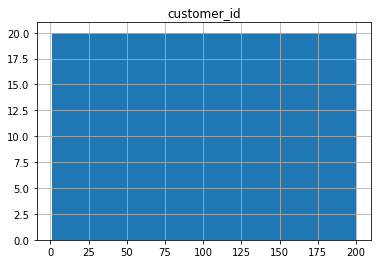

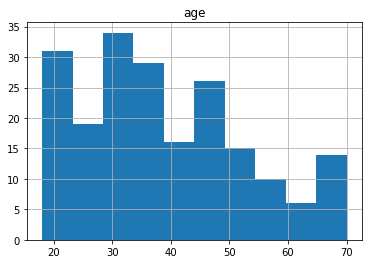

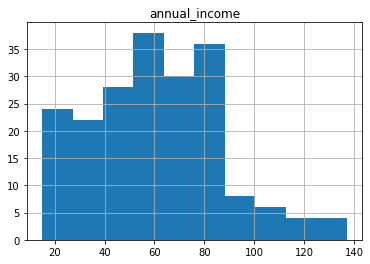

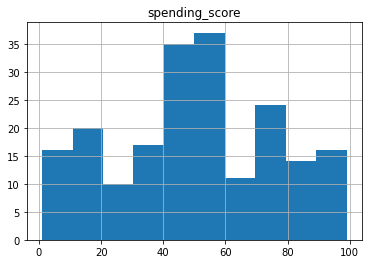

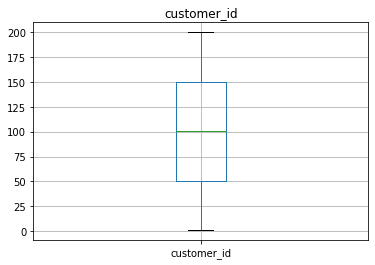

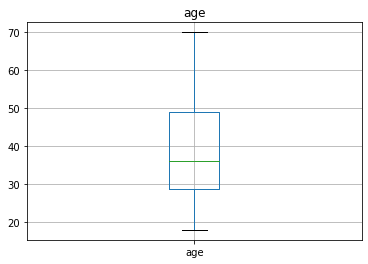

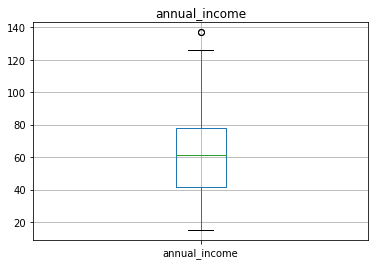

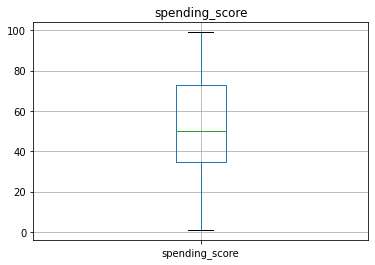

Female    112
Male       88
Name: gender, dtype: int64


In [28]:
def summarize_mall(df):
    print(df.describe())
    for col in df.select_dtypes(exclude='object').columns.tolist():
        df[col].hist()
        plt.title(col)
        plt.show()
    for col in df.select_dtypes(exclude='object').columns.tolist():
        df.boxplot(column=[col])
        plt.title(col)
        plt.show()
    for col in df.select_dtypes(include='object').columns.tolist():
        print(df[col].value_counts())
        
summarize_mall(df)

3. Detect outliers using IQR.

In [29]:
def get_outliers(col_name, multiplier = 1.5):
    '''
    Returns a tuple of the form (lower_IQR, upper_IQR) based on passed col_name
    '''
    stats = df[[col_name]].describe().T
    iqr = float(stats['75%']) - float(stats['25%'])
    upper_range = float(stats['75%']) + iqr*multiplier
    lower_range = float(stats['25%']) - iqr*multiplier
    return (lower_range, upper_range)

get_outliers('annual_income')

(-13.25, 132.75)

4. Split data into train, validate, and test.

In [30]:
from sklearn.model_selection import train_test_split

def split_data(df):
    '''splits the zillow dataframe into train, test and validate subsets
    
    Args:
        df (DataFrame) : dataframe to split
    Return:
        train, test, validate (DataFrame) :  dataframes split from the original dataframe
    '''
    RAND_SEED = 123
    #make train and test
    train, test = train_test_split(df, train_size = 0.8, random_state=RAND_SEED)
    #make validate
    train, validate = train_test_split(train, train_size = 0.7, random_state=RAND_SEED)
    return train, validate, test

train, validate, test = split_data(df)
train

,customer_id,gender,age,annual_income,spending_score
123,124,Male,39,69,91
76,77,Female,45,54,53
171,172,Male,28,87,75
10,11,Male,67,19,14
35,36,Female,21,33,81
...,...,...,...,...,...
175,176,Female,30,88,86
101,102,Female,49,62,48
148,149,Female,34,78,22
99,100,Male,20,61,49


5. Encode categorical columns using a one hot encoder (pd.get_dummies).


In [31]:
def encode_columns(df,
                    column_names):
    '''encodes columns as passed in column_names'''
    #make dummies
    dummy_df = pd.get_dummies(df[column_names], drop_first=True)
    #add to the existing dataframe
    df = pd.concat([df, dummy_df], axis=1).drop(columns = column_names)
    return df

encode_columns(train, ['gender'])

,customer_id,age,annual_income,spending_score,gender_Male
123,124,39,69,91,1
76,77,45,54,53,0
171,172,28,87,75,1
10,11,67,19,14,1
35,36,21,33,81,0
...,...,...,...,...,...
175,176,30,88,86,0
101,102,49,62,48,0
148,149,34,78,22,0
99,100,20,61,49,1


6. Handles missing values.

In [32]:
def handle_missing(df):
    return df.dropna()

handle_missing(df)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


7. Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

def mall_scale(df,
                column_names,
                scaler_in=MinMaxScaler(),
                return_scalers=False):
    '''
    Returns a dataframe of the scaled columns
    
    Args:
        df (DataFrame) : The dataframe with the columns to scale
        column_names (list) : The columns to scale
        scaler_in (sklearn.preprocessing) : scaler to use, default = MinMaxScaler()
        return_scalers (bool) : boolean to return a dictionary of the scalers used for 
            the columns, default = False
    Returns:
        df_scaled (DataFrame) : A dataframe containing the scaled columns
        scalers (dictionary) : a dictionary containing 'column' for the column name, 
            and 'scaler' for the scaler object used on that column
    '''
    #variables to hold the returns
    scalers = []
    df_scaled = df[column_names]
    for column_name in column_names:
        #determine the scaler
        scaler = scaler_in
        #fit the scaler
        scaler.fit(df[[column_name]])
        #transform the data
        scaled_col = scaler.transform(df[[column_name]])
        #store the column name and scaler
        scaler = {
            'column':column_name,
            'scaler':scaler
        }
        scalers.append(scaler)
        #store the transformed data
        df[f"{column_name}_scaled"] = scaled_col
    #determine the correct varibales to return
    if return_scalers:
        return df.drop(columns = column_names), scalers
    else:
        return df.drop(columns = column_names)

mall_scale(df, ['age', 'annual_income', 'spending_score'])

,customer_id,gender,age_scaled,annual_income_scaled,spending_score_scaled
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918
196,197,Female,0.519231,0.909836,0.275510
197,198,Male,0.269231,0.909836,0.744898
198,199,Male,0.269231,1.000000,0.173469


Encapsulate your work in a wrangle_mall.py python module.

In [34]:
import wrangle_mall

In [35]:
wrangle_mall.mall_data()

Returning saved csv file.


,customer_id,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
0,1,1,0.019231,0.000000,0.387755
1,2,1,0.057692,0.000000,0.816327
2,3,0,0.038462,0.008197,0.051020
3,4,0,0.096154,0.008197,0.775510
4,5,0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,0,0.326923,0.860656,0.795918
196,197,0,0.519231,0.909836,0.275510
197,198,1,0.269231,0.909836,0.744898
198,199,1,0.269231,1.000000,0.173469
